In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

### Using Data

In [2]:
F1 = np.array([0.2, 0.3, 0.7, 1, 1.3, 1.8, 2, 2.1, 2.2, 3, 4, 4.2, 4, 4.7, 5.0, 5.9])
T = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

feature = np.array([F1]).T
target = T

### LogisticRegression to Gradient Descent

In [3]:
class SimpleLogisticRegression:

    def __init__(self, alpha=0.01, iterations=1000):
        self.alpha = alpha # learning rate
        self.iterations = iterations
        self.coef_ = None 
        self.intercept_ = None 
        self._log_loss = None # log loss

    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    
    def fit(self, X_data, y_data):
        m = len(y_data)

        # W, b initialize
        theta = np.zeros((X_data.shape[1] + 1))
        self.coef_ = theta[1:]
        self.intercept_ = theta[0]

        bias_term = np.ones((X_data.shape[0], 1))
        X = np.concatenate((bias_term, X_data), axis=1)

        # Gradient Descent
        for i in range(self.iterations):
            linear_hypothesis_func = X @ theta
            pred = self._sigmoid(linear_hypothesis_func)
            error = pred - y_data
            self._log_loss = - (1 / m) * np.sum(y_data * np.log(pred) + (1 - y_data) * np.log(1 - pred))

            theta -= self.alpha * (X.T @ error) / len(X)
            self.coef_ = theta[1:]
            self.intercept_ = theta[0]
            print(f'Epoch [{i + 1}/{self.iterations}] | log_loss: {self._log_loss:.4f}')

    
    def predict(self, X_data):
        linear_hypothesis_func = X_data @ self.coef_ + self.intercept_ 
        pred = self._sigmoid(linear_hypothesis_func) 
        pred_result = [1 if i >= 0.5 else 0 for i in pred]
        return np.array(pred_result)


    def score(self, X_data, y_data):
        linear_hypothesis_func = X_data @ self.coef_ + self.intercept_ 
        pred = self._sigmoid(linear_hypothesis_func)
        pred_result = [1 if i >= 0.5 else 0 for i in pred]
        
        true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_data, pred_result).ravel()
        accuracy_score = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
        return accuracy_score



In [4]:
simple_logistic_model = SimpleLogisticRegression()
simple_logistic_model.fit(feature, target)
theta = f'intercept(b): {simple_logistic_model.intercept_} | coef(W): {simple_logistic_model.coef_}'
score = f'score: {simple_logistic_model.score(feature, target)}'
predict = f'predict: {simple_logistic_model.predict([[1]])}'
print(theta)
print(score)
print(predict)

Epoch [1/1000] | log_loss: 0.6931
Epoch [2/1000] | log_loss: 0.6878
Epoch [3/1000] | log_loss: 0.6827
Epoch [4/1000] | log_loss: 0.6778
Epoch [5/1000] | log_loss: 0.6732
Epoch [6/1000] | log_loss: 0.6688
Epoch [7/1000] | log_loss: 0.6646
Epoch [8/1000] | log_loss: 0.6606
Epoch [9/1000] | log_loss: 0.6569
Epoch [10/1000] | log_loss: 0.6532
Epoch [11/1000] | log_loss: 0.6498
Epoch [12/1000] | log_loss: 0.6465
Epoch [13/1000] | log_loss: 0.6434
Epoch [14/1000] | log_loss: 0.6404
Epoch [15/1000] | log_loss: 0.6376
Epoch [16/1000] | log_loss: 0.6348
Epoch [17/1000] | log_loss: 0.6322
Epoch [18/1000] | log_loss: 0.6297
Epoch [19/1000] | log_loss: 0.6273
Epoch [20/1000] | log_loss: 0.6251
Epoch [21/1000] | log_loss: 0.6229
Epoch [22/1000] | log_loss: 0.6208
Epoch [23/1000] | log_loss: 0.6188
Epoch [24/1000] | log_loss: 0.6168
Epoch [25/1000] | log_loss: 0.6150
Epoch [26/1000] | log_loss: 0.6132
Epoch [27/1000] | log_loss: 0.6115
Epoch [28/1000] | log_loss: 0.6098
Epoch [29/1000] | log_loss: 0

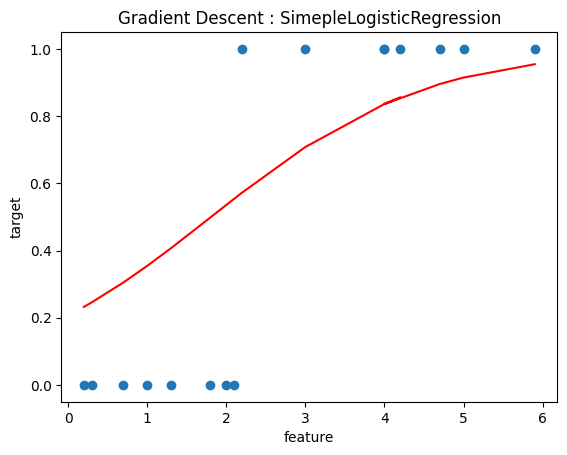

In [6]:
plt.scatter(feature, target)
plt.plot(feature, 1 / (1 + np.exp(-(simple_logistic_model.coef_ * feature + simple_logistic_model.intercept_))), color='red')

plt.title('Gradient Descent : SimepleLogisticRegression')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

### LogisticRegression to Normal Equation

In [9]:
class MyLogisticRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


    def fit(self, X_data, y_data):
        bias_term = np.ones((X_data.shape[0], 1), dtype=float)
        X = np.concatenate([bias_term, X_data], axis=1)
        
        theta = np.linalg.inv(X.T @ X) @ (X.T @ y_data) # normal_equation
        self.coef_ = theta[1:]
        self.intercept_ = theta[0]


    def predict(self, X_data): 
        linear_hypothesis_func = X_data @ self.coef_ + self.intercept_
        pred = self._sigmoid(linear_hypothesis_func)
        pred_result = [1 if i >= 0.5 else 0 for i in pred]
        return pred_result


    def score(self, X_data, y_data):
        linear_hypothesis_func = X_data @ self.coef_ + self.intercept_
        pred = self._sigmoid(linear_hypothesis_func)
        pred_result = [1 if i >= 0.5 else 0 for i in pred]

        true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_data, pred_result).ravel()
        accuracy_score = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
        return accuracy_score

In [10]:
my_logistic_model = MyLogisticRegression()
my_logistic_model.fit(feature, target)
theta = f'intercept(b): {my_logistic_model.intercept_} | coef(W): {my_logistic_model.coef_}'
score = f'score: {my_logistic_model.score(feature, target)}'
predict = f'predict: {my_logistic_model.predict([[1]])}'
print(theta)
print(score)
print(predict)

intercept(b): -0.15172988745310567 | coef(W): [0.24593581]
score: 0.625
predict: [1]


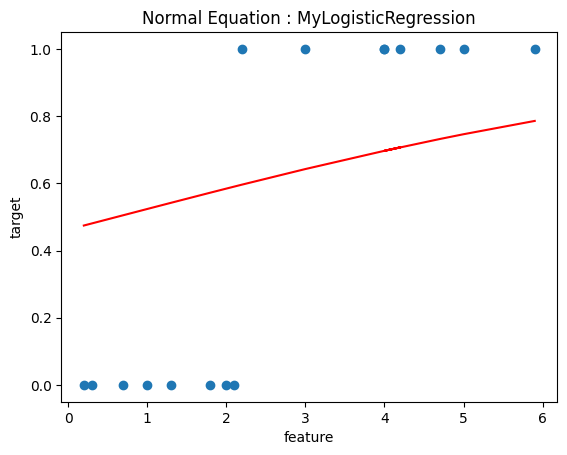

In [11]:
plt.scatter(feature, target)
plt.plot(feature, 1 / (1 + np.exp(-(my_logistic_model.coef_ * feature + my_logistic_model.intercept_))), color='red')

plt.title('Normal Equation : MyLogisticRegression')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

### LogisticRegression to scikit-learn

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(feature, target)
theta = f'intercept(b): {logistic_model.intercept_} | coef(W): {logistic_model.coef_}'
score = f'score: {logistic_model.score(feature, target)}'
predict = f'predict: {logistic_model.predict([[1]])}'
print(theta)
print(score)
print(predict)

intercept(b): [-3.84796021] | coef(W): [[1.5315554]]
score: 0.9375
predict: [0]


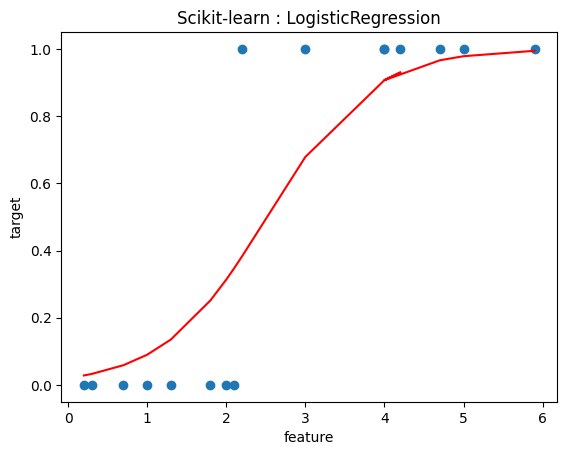

In [14]:
plt.scatter(feature, target)
plt.plot(feature, 1 / (1 + np.exp(-(logistic_model.coef_ * feature + logistic_model.intercept_))), color='red')

plt.title('Scikit-learn : LogisticRegression')
plt.xlabel('feature')
plt.ylabel('target')
plt.show()